<a href="https://colab.research.google.com/github/DebarajPurohit/Hotel_booking_analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [3]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Almabetter/CAPSTONE PROJECT/PROJECT-1 EDA/HOTEL BOOKING EDA/Hotel Bookings.csv'

In [4]:
hotel_df = pd.read_csv(file_path)

In [5]:
hotel_df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15


In [6]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## 1. Booking growth in hotel
## --- Year Wise
##--- Country wise
## 2. Percentage for booking each year

## To get the exact data of booking growth each year, we have to first group the data Year Wise and then we have to group the data as per Hotel Type. We then sort the data as per reservation_status.

In [8]:
year_wise_df = hotel_df.groupby(['arrival_date_year', 'reservation_status'])[['hotel']].count().unstack()

In [9]:
year_wise_df

hotel                  
reservation_status Canceled Check-Out No-Show
arrival_date_year                            
2015                   7951     13854     191
2016                  19669     36370     668
2017                  15397     24942     348

In [10]:
year_wise_df = hotel_df.groupby(['arrival_date_year','hotel','reservation_status'])[['reservation_status']].count().unstack()

In [11]:
year_wise_df

reservation_status                  
reservation_status                       Canceled Check-Out No-Show
arrival_date_year hotel                                            
2015              City Hotel                 5882      7678     122
                  Resort Hotel               2069      6176      69
2016              City Hotel                14852     22733     555
                  Resort Hotel               4817     13637     113
2017              City Hotel                11452     15817     239
                  Resort Hotel               3945      9125     109

## To sum the elements of MultiIndex Dataframe, we have sum().

In [12]:
year_wise_df['total_booking'] = year_wise_df.sum(level=0, axis=1)

In [13]:
year_wise_df

reservation_status  ... total_booking
reservation_status                       Canceled  ...              
arrival_date_year hotel                            ...              
2015              City Hotel                 5882  ...         13682
                  Resort Hotel               2069  ...          8314
2016              City Hotel                14852  ...         38140
                  Resort Hotel               4817  ...         18567
2017              City Hotel                11452  ...         27508
                  Resort Hotel               3945  ...         13179

[6 rows x 4 columns]

## **Percentage of Booking (of a specified hotel type/all hotel types) in a year =  Booking in that year/overall booking in 3 years**
## We have data of Resort Hotel and City Hotel is given seaparetly year wise. Our next step is get the sum of Resort Hotel and City Hotel over 2 years from 2015 to 2017

In [14]:
year_wise_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 6 entries, (2015, 'City Hotel') to (2017, 'Resort Hotel')
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   (reservation_status, Canceled)   6 non-null      int64
 1   (reservation_status, Check-Out)  6 non-null      int64
 2   (reservation_status, No-Show)    6 non-null      int64
 3   (total_booking, )                6 non-null      int64
dtypes: int64(4)
memory usage: 364.0+ bytes


In [15]:
Total_booking_3years = year_wise_df.groupby(['hotel']).sum()

In [16]:
Total_booking_3years

reservation_status                   total_booking
reservation_status           Canceled Check-Out No-Show              
hotel                                                                
City Hotel                      32186     46228     916         79330
Resort Hotel                    10831     28938     291         40060

In [17]:
Total_booking_3years.index

Index(['City Hotel', 'Resort Hotel'], dtype='object', name='hotel')

In [18]:
total_no_of_bookings = Total_booking_3years['total_booking'].sum()

In [19]:
total_no_of_bookings

119390

## Q1. What is the percentage of booking as per hotel type over 3 years?
## **For Resort hotel type**
##          **% of booking (Resort Hotel) = total bookings for Resort Hotel in 3 years/ overall booking in 3 years**
## **For City hotel type**
##          **% of booking (City Hotel) = total bookings for City hotel in 3 years/ overall booking in 3 years**

In [20]:
Total_booking_3years['% Booking'] = (Total_booking_3years['total_booking']/total_no_of_bookings)*100

In [21]:
Total_booking_3years

reservation_status            ... total_booking  % Booking
reservation_status           Canceled Check-Out  ...                         
hotel                                            ...                         
City Hotel                      32186     46228  ...         79330  66.446101
Resort Hotel                    10831     28938  ...         40060  33.553899

[2 rows x 5 columns]

In [22]:
Total_booking_3years.index

Index(['City Hotel', 'Resort Hotel'], dtype='object', name='hotel')

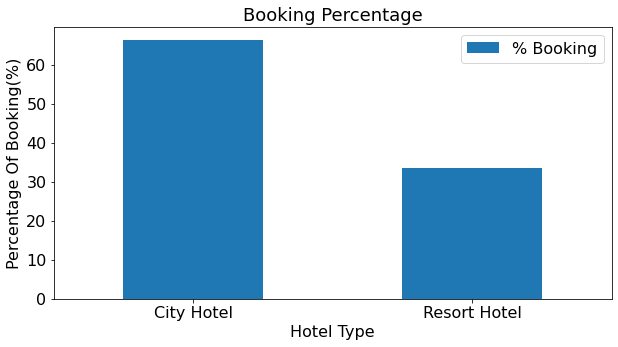

In [23]:
ax1=Total_booking_3years.plot.bar(y= '% Booking', figsize=(10,5), fontsize= 16, rot = 0)
ax1.set_title('Booking Percentage', fontsize= 18)
ax1.set_xlabel('Hotel Type', fontsize= 16)
ax1.set_ylabel('Percentage Of Booking(%)', fontsize= 16)
ax1.legend(fontsize= 16)
#Total_booking_3years

Text(0.5, 1.0, 'Overall booking City Hotel Vs Resort Hotel')

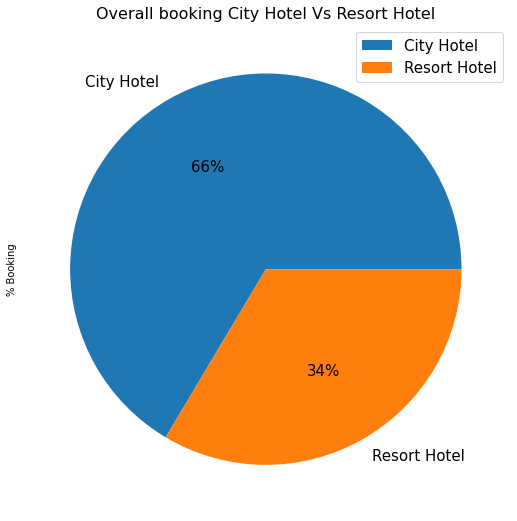

In [24]:
ax1= Total_booking_3years.plot.pie(y = '% Booking', figsize=(10,9), fontsize=15,autopct='%1.0f%%')
ax1.legend(fontsize=15)
ax1.set_title("Overall booking City Hotel Vs Resort Hotel", fontsize=16)

## As per the given Dataset from the year 2015 to year 2017, City Hotel is preferred by **66.45%** of people. The possible reasons may be because of 
## 1. Low Cost
## 2. Easy availability
## The above graph shows overall booking status which includes the cancelled booking also, in futher study, we will dig down and study the data more deeply. Let's go back to our original dataframe i.e, **hotel_df**

In [25]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [26]:
cancellation_df = hotel_df.groupby(['hotel','is_canceled'])['is_canceled'].count().unstack()

In [27]:
cancellation_df

is_canceled,0,1
hotel,,
City Hotel,46228,33102
Resort Hotel,28938,11122


In [28]:
cancellation_df.rename(columns = {1:'canceled bookings',0:'confirmed bookings'}, inplace= True)

In [29]:
cancellation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, City Hotel to Resort Hotel
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   confirmed bookings  2 non-null      int64
 1   canceled bookings   2 non-null      int64
dtypes: int64(2)
memory usage: 48.0+ bytes


In [30]:
cancellation_df['Total_booking_hotel_wise'] = cancellation_df['confirmed bookings']+ cancellation_df['canceled bookings']

In [31]:
cancellation_df

is_canceled,confirmed bookings,canceled bookings,Total_booking_hotel_wise
hotel,,,
City Hotel,46228,33102,79330
Resort Hotel,28938,11122,40060


In [32]:
Total_booking = cancellation_df['Total_booking_hotel_wise'].sum()

In [33]:
cancellation_df['Booking_%_wrt_total_booking'] = (cancellation_df['Total_booking_hotel_wise']/Total_booking)*100

In [34]:
cancellation_df

is_canceled,confirmed bookings,canceled bookings,Total_booking_hotel_wise,Booking_%_wrt_total_booking
hotel,,,,
City Hotel,46228,33102,79330,66.446101
Resort Hotel,28938,11122,40060,33.553899


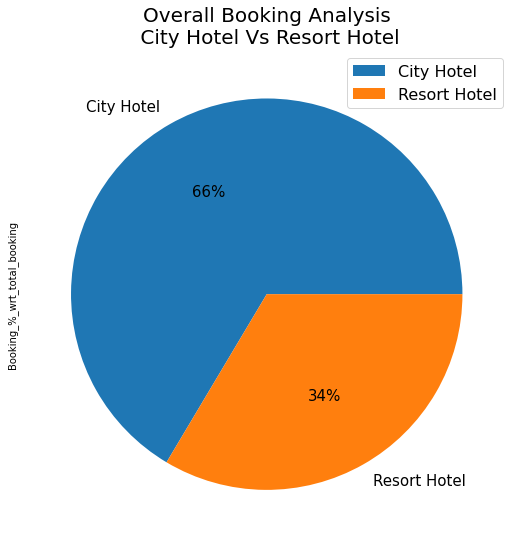

In [35]:
ax1= cancellation_df.plot.pie(y='Booking_%_wrt_total_booking',figsize=(10,9),fontsize= 15, autopct='%1.0f%%')
ax1.set_title('Overall Booking Analysis\n City Hotel Vs Resort Hotel', fontsize= 20)
ax1.legend(fontsize= 16)

In [36]:
Total_cancellation = cancellation_df['canceled bookings'].sum()

In [37]:
cancellation_df['cancellation_%_wrt_total_booking'] = (cancellation_df['canceled bookings']/Total_booking)*100

In [38]:
cancellation_df

is_canceled,confirmed bookings,canceled bookings,Total_booking_hotel_wise,Booking_%_wrt_total_booking,cancellation_%_wrt_total_booking
hotel,,,,,
City Hotel,46228,33102,79330,66.446101,27.725940
Resort Hotel,28938,11122,40060,33.553899,9.315688


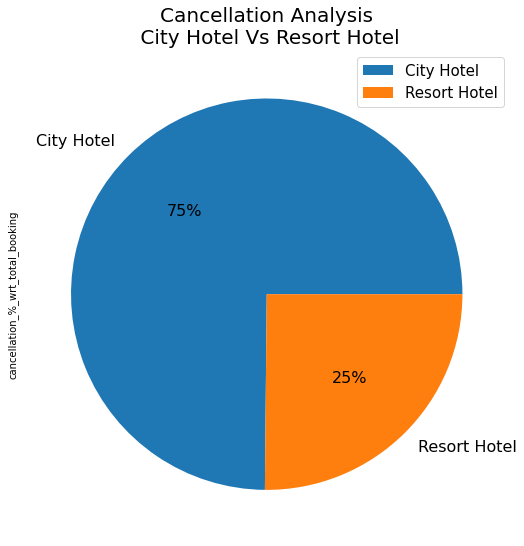

In [39]:
ax1 = cancellation_df.plot.pie(y= 'cancellation_%_wrt_total_booking', figsize= (10,9), fontsize=16, autopct='%1.0f%%')
ax1.set_title('Cancellation Analysis\n City Hotel Vs Resort Hotel', fontsize=20)
ax1.legend(fontsize=15)

In [40]:
# Calculate conversion Rate
cancellation_df['conversion Rate'] = (cancellation_df['confirmed bookings']/cancellation_df['Total_booking_hotel_wise'])*100

In [41]:
cancellation_df

is_canceled,confirmed bookings,canceled bookings,Total_booking_hotel_wise,Booking_%_wrt_total_booking,cancellation_%_wrt_total_booking,conversion Rate
hotel,,,,,,
City Hotel,46228,33102,79330,66.446101,27.725940,58.273037
Resort Hotel,28938,11122,40060,33.553899,9.315688,72.236645


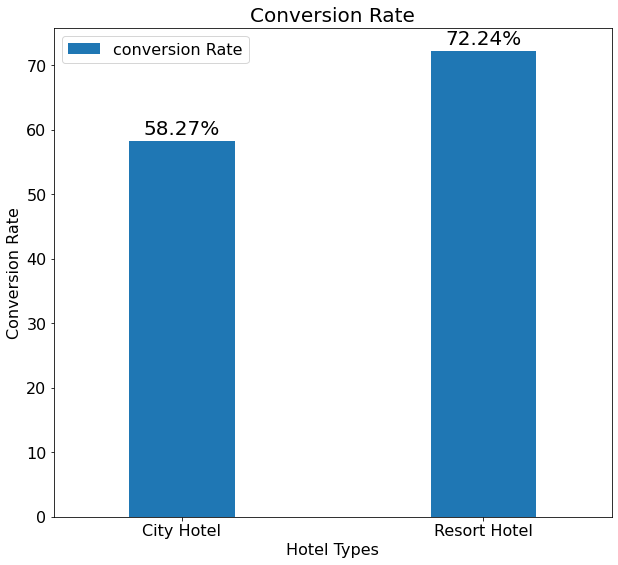

In [42]:
ax1 = cancellation_df.plot.bar(y='conversion Rate',figsize= (10,9), width=0.35, fontsize=16, rot=0)
ax1.set_title('Conversion Rate', fontsize=20)
ax1.set_xlabel('Hotel Types', fontsize=16)
ax1.set_ylabel('Conversion Rate', fontsize=16)
ax1.legend(fontsize=16)
for index,data in enumerate(cancellation_df['conversion Rate']):
  plt.text(x=index , y =data+1 , s= f'{round(data,2)}%' , fontdict=dict(fontsize=20), ha='center')

# **Booking growth in hotel year wise**
## To analyse the above question properly we have to group the hotels year wise for bookings that are not cancelled.

In [43]:
year_wise_df['valid_booking %'] = (year_wise_df[('reservation_status','Check-Out')]/year_wise_df[('total_booking','')])*100

In [44]:
year_wise_df

reservation_status  ... valid_booking %
reservation_status                       Canceled  ...                
arrival_date_year hotel                            ...                
2015              City Hotel                 5882  ...       56.117527
                  Resort Hotel               2069  ...       74.284340
2016              City Hotel                14852  ...       59.604090
                  Resort Hotel               4817  ...       73.447514
2017              City Hotel                11452  ...       57.499636
                  Resort Hotel               3945  ...       69.238941

[6 rows x 5 columns]

In [45]:
valid_booking_df = year_wise_df.groupby(['hotel','arrival_date_year'])['valid_booking %'].mean().unstack()

In [46]:
valid_booking_df

arrival_date_year,2015,2016,2017
hotel,,,
City Hotel,56.117527,59.604090,57.499636
Resort Hotel,74.284340,73.447514,69.238941


In [47]:
valid_booking_df.columns

Int64Index([2015, 2016, 2017], dtype='int64', name='arrival_date_year')

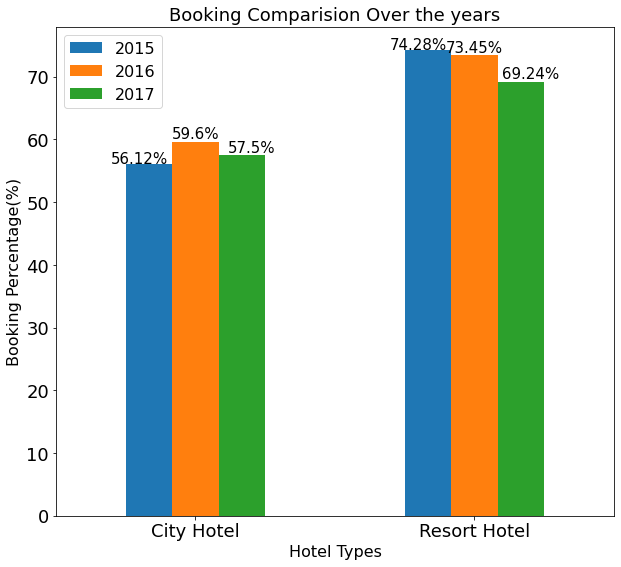

In [48]:
ax1=valid_booking_df.plot.bar(figsize = (10,9), fontsize = 18, rot=0)
ax1.set_title('Booking Comparision Over the years', fontsize= 18)
ax1.set_xlabel('Hotel Types', fontsize=16)
ax1.set_ylabel('Booking Percentage(%)', fontsize=16)
ax1.legend(fontsize=16)
for index,data in enumerate(valid_booking_df[2015]):
  plt.text(x=index-0.20 , y =data , s= f'{round(data,2)}%' , fontdict=dict(fontsize=15), ha='center')
for index,data in enumerate(valid_booking_df[2016]):
  plt.text(x=index , y =data+0.5 , s= f'{round(data,2)}%' , fontdict=dict(fontsize=15), ha='center')
for index,data in enumerate(valid_booking_df[2017]):
  plt.text(x=index+0.20 , y =data+0.5 , s= f'{round(data,2)}%' , fontdict=dict(fontsize=15), ha='center')

##--> **Booking analysis country wise**

In [49]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [50]:
hotel_df_copy = hotel_df.copy()

## In the country column there are 488 rows with NaN data. Since there isn't any other column giving us any hint about data that should be in country column against NaN value, it is better to delete the rows for proper analysis.

In [52]:
country_df_withno_na= hotel_df.loc[~hotel_df['country'].isna()]

In [53]:
country_df_withno_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118902 non-null  object 
 1   is_canceled                     118902 non-null  int64  
 2   lead_time                       118902 non-null  int64  
 3   arrival_date_year               118902 non-null  int64  
 4   arrival_date_month              118902 non-null  object 
 5   arrival_date_week_number        118902 non-null  int64  
 6   arrival_date_day_of_month       118902 non-null  int64  
 7   stays_in_weekend_nights         118902 non-null  int64  
 8   stays_in_week_nights            118902 non-null  int64  
 9   adults                          118902 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118902 non-null  int64  
 12  meal            

In [54]:
country_wise_booking_df= country_df_withno_na.groupby(['country','hotel'],sort= False)[['hotel']].count().unstack()

In [55]:
country_wise_booking_df.head(15)

hotel           
hotel   Resort Hotel City Hotel
country                        
PRT          17630.0    30960.0
GBR           6814.0     5315.0
USA            479.0     1618.0
ESP           3957.0     4611.0
IRL           2166.0     1209.0
FRA           1611.0     8804.0
ROU            177.0      323.0
NOR            123.0      484.0
OMN             11.0        7.0
ARG             57.0      157.0
POL            333.0      586.0
DEU           1203.0     6084.0
BEL            448.0     1894.0
CHE            435.0     1295.0
CN             710.0      569.0

In [56]:
country_wise_booking_df.columns

MultiIndex([('hotel', 'Resort Hotel'),
            ('hotel',   'City Hotel')],
           names=[None, 'hotel'])

## *Countries where Resort Hotels are more preferred over City Hotels*

In [57]:
Resort_hotel_more_preferred_df = country_wise_booking_df.loc[country_wise_booking_df[('hotel','Resort Hotel')]>country_wise_booking_df[('hotel','City Hotel')],:]

In [58]:
Resort_hotel_more_preferred_df

hotel           
hotel   Resort Hotel City Hotel
country                        
GBR           6814.0     5315.0
IRL           2166.0     1209.0
OMN             11.0        7.0
CN             710.0      569.0
LVA             33.0       22.0
PRI              9.0        3.0
LTU             46.0       35.0
JAM              5.0        1.0
AND              5.0        2.0
GIB             13.0        5.0
CAF              3.0        2.0
SUR              4.0        1.0

In [59]:
Resort_hotel_more_preferred_df['Total Bookings'] = Resort_hotel_more_preferred_df.sum(level= 0, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
Resort_hotel_more_preferred_df

hotel            Total Bookings
hotel   Resort Hotel City Hotel               
country                                       
GBR           6814.0     5315.0        12129.0
IRL           2166.0     1209.0         3375.0
OMN             11.0        7.0           18.0
CN             710.0      569.0         1279.0
LVA             33.0       22.0           55.0
PRI              9.0        3.0           12.0
LTU             46.0       35.0           81.0
JAM              5.0        1.0            6.0
AND              5.0        2.0            7.0
GIB             13.0        5.0           18.0
CAF              3.0        2.0            5.0
SUR              4.0        1.0            5.0

In [61]:
Resort_hotel_more_preferred_df['Resort Hotel Booking %'] = (Resort_hotel_more_preferred_df[('hotel','Resort Hotel')]/Resort_hotel_more_preferred_df[('Total Bookings','')])*100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
Resort_hotel_more_preferred_df['City Hotel Booking %'] = (Resort_hotel_more_preferred_df[('hotel','City Hotel')]/Resort_hotel_more_preferred_df[('Total Bookings','')])*100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
Resort_hotel_more_preferred_df

hotel             ... Resort Hotel Booking % City Hotel Booking %
hotel   Resort Hotel City Hotel  ...                                            
country                          ...                                            
GBR           6814.0     5315.0  ...              56.179405            43.820595
IRL           2166.0     1209.0  ...              64.177778            35.822222
OMN             11.0        7.0  ...              61.111111            38.888889
CN             710.0      569.0  ...              55.512119            44.487881
LVA             33.0       22.0  ...              60.000000            40.000000
PRI              9.0        3.0  ...              75.000000            25.000000
LTU             46.0       35.0  ...              56.790123            43.209877
JAM              5.0        1.0  ...              83.333333            16.666667
AND              5.0        2.0  ...              71.428571            28.571429
GIB             13.0        5.0  ...              72.222222            27.777778
CAF              3.0        2.0  ...              60.000000            40.000000
SUR              4.0        1.0  ...              80.000000            20.000000

[12 rows x 5 columns]

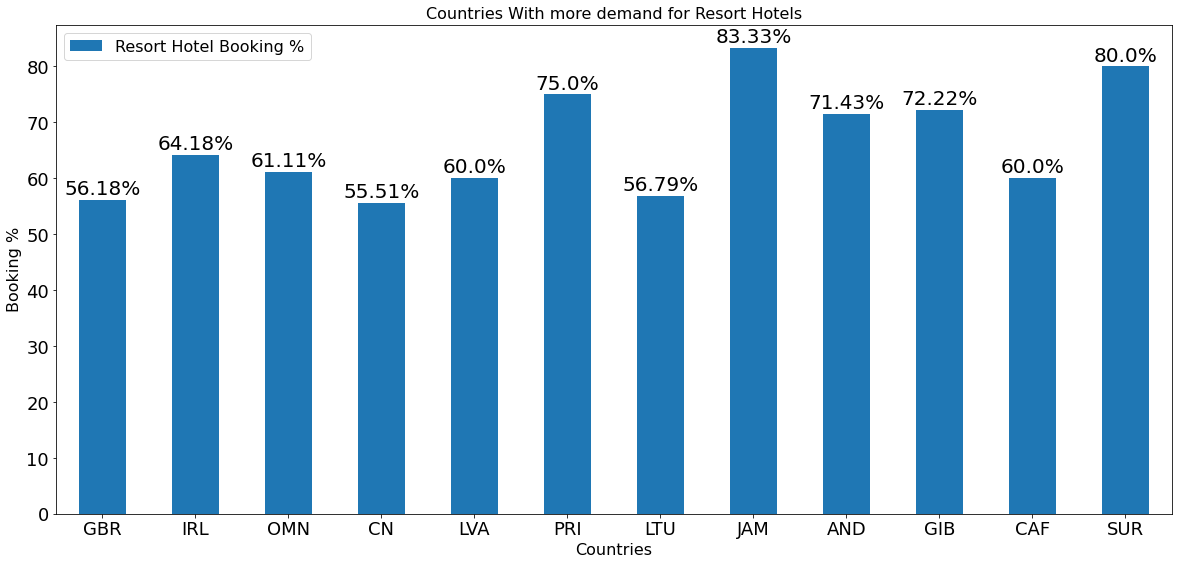

In [64]:
ax1= Resort_hotel_more_preferred_df.plot.bar(y='Resort Hotel Booking %',figsize = (20,9), fontsize= 18, rot=0)
ax1.set_title("Countries With more demand for Resort Hotels", fontsize=16)
ax1.set_xlabel('Countries', fontsize= 16)
ax1.set_ylabel('Booking %', fontsize=16)
ax1.legend(fontsize= 16, loc='upper left')
for index,data in enumerate(Resort_hotel_more_preferred_df['Resort Hotel Booking %']):
  plt.text(x=index , y =data+1 , s= f'{round(data,2)}%' , fontdict=dict(fontsize=20), ha='center')

# type of room and adr distribution across different months

In [65]:
hotel_df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15


In [66]:
resort_df=hotel_df.loc[hotel_df['hotel']=='Resort Hotel'][['hotel','arrival_date_month','assigned_room_type','adr']]
city_df=hotel_df.loc[hotel_df['hotel']=='City Hotel'][['hotel','arrival_date_month','assigned_room_type','adr']]

In [67]:
resort_df.head(3)

,hotel,arrival_date_month,assigned_room_type,adr
0,Resort Hotel,July,C,0.0
1,Resort Hotel,July,C,0.0
2,Resort Hotel,July,C,75.0


In [68]:
adr_resort_df= resort_df.groupby(['arrival_date_month','assigned_room_type'])['adr'].mean().unstack()

In [69]:
adr_resort_df

assigned_room_type,A,B,C,D,E,F,G,H,I,L,P
arrival_date_month,,,,,,,,,,,
April,66.873139,77.046667,83.957343,73.107093,89.354293,95.302409,136.504626,146.416170,38.080000,NaN,NaN
August,166.188725,166.563429,208.749581,182.832802,192.811411,208.599920,258.959619,273.538226,93.998235,NaN,NaN
December,63.838404,45.606667,87.754175,61.225693,79.698457,89.384186,112.810361,121.037209,21.483333,NaN,NaN
February,50.085972,35.666667,65.746899,50.874748,64.942891,68.446190,90.622190,106.540556,18.406087,NaN,0.0
January,44.696784,34.933333,50.098421,45.669857,60.569833,57.196452,80.680714,87.126071,9.954545,NaN,NaN
July,134.711490,134.564545,168.287872,153.129021,165.809018,180.454595,216.688789,224.651304,57.814048,8.0,NaN
June,95.949922,99.632381,132.758077,98.911147,120.961719,138.513699,167.399392,188.200000,63.673571,NaN,NaN
March,49.637858,51.181818,58.651273,55.352293,68.831207,75.433151,98.382063,97.814706,31.917222,NaN,NaN
May,65.756235,74.947143,78.559804,76.011980,92.894139,101.295125,138.043077,131.376719,33.698039,NaN,NaN


In [70]:
Months_name=['January','February','March','April','May','June','July','August','September','October','November','December']
adr_resort_df.index=pd.CategoricalIndex(adr_resort_df.index, categories=Months_name, ordered=True)
adr_resort_df = adr_resort_df.sort_index()

In [71]:
adr_resort_df

assigned_room_type,A,B,C,D,E,F,G,H,I,L,P
arrival_date_month,,,,,,,,,,,
January,44.696784,34.933333,50.098421,45.669857,60.569833,57.196452,80.680714,87.126071,9.954545,NaN,NaN
February,50.085972,35.666667,65.746899,50.874748,64.942891,68.446190,90.622190,106.540556,18.406087,NaN,0.0
March,49.637858,51.181818,58.651273,55.352293,68.831207,75.433151,98.382063,97.814706,31.917222,NaN,NaN
April,66.873139,77.046667,83.957343,73.107093,89.354293,95.302409,136.504626,146.416170,38.080000,NaN,NaN
May,65.756235,74.947143,78.559804,76.011980,92.894139,101.295125,138.043077,131.376719,33.698039,NaN,NaN
June,95.949922,99.632381,132.758077,98.911147,120.961719,138.513699,167.399392,188.200000,63.673571,NaN,NaN
July,134.711490,134.564545,168.287872,153.129021,165.809018,180.454595,216.688789,224.651304,57.814048,8.0,NaN
August,166.188725,166.563429,208.749581,182.832802,192.811411,208.599920,258.959619,273.538226,93.998235,NaN,NaN
September,74.718118,82.830000,99.861278,94.340754,109.018380,124.893871,153.492875,158.724286,64.342857,NaN,NaN


In [72]:
adr_resort_df=adr_resort_df.fillna(0)
adr_resort_df

assigned_room_type,A,B,C,D,E,F,G,H,I,L,P
arrival_date_month,,,,,,,,,,,
January,44.696784,34.933333,50.098421,45.669857,60.569833,57.196452,80.680714,87.126071,9.954545,0.0,0.0
February,50.085972,35.666667,65.746899,50.874748,64.942891,68.446190,90.622190,106.540556,18.406087,0.0,0.0
March,49.637858,51.181818,58.651273,55.352293,68.831207,75.433151,98.382063,97.814706,31.917222,0.0,0.0
April,66.873139,77.046667,83.957343,73.107093,89.354293,95.302409,136.504626,146.416170,38.080000,0.0,0.0
May,65.756235,74.947143,78.559804,76.011980,92.894139,101.295125,138.043077,131.376719,33.698039,0.0,0.0
June,95.949922,99.632381,132.758077,98.911147,120.961719,138.513699,167.399392,188.200000,63.673571,0.0,0.0
July,134.711490,134.564545,168.287872,153.129021,165.809018,180.454595,216.688789,224.651304,57.814048,8.0,0.0
August,166.188725,166.563429,208.749581,182.832802,192.811411,208.599920,258.959619,273.538226,93.998235,0.0,0.0
September,74.718118,82.830000,99.861278,94.340754,109.018380,124.893871,153.492875,158.724286,64.342857,0.0,0.0


In [73]:
adr_city_df= city_df.groupby(['arrival_date_month','assigned_room_type'])['adr'].mean().unstack()
adr_city_df

assigned_room_type,A,B,C,D,E,F,G,K,P
arrival_date_month,,,,,,,,,
April,100.660533,97.074431,107.620000,127.819188,159.179793,191.407067,197.852969,71.364000,0.0
August,100.638361,95.652510,106.828462,138.797752,162.757843,197.797760,222.707475,87.015476,0.0
December,81.228731,83.372394,65.060000,101.782615,126.365875,157.949344,135.149250,49.778636,0.0
February,78.467295,71.902650,76.880000,97.913163,107.134513,153.042193,176.623500,49.138333,NaN
January,78.476215,77.274390,NaN,92.772441,108.701446,136.546780,143.883077,44.203333,NaN
July,97.394711,89.644211,103.992083,137.515175,161.666643,187.227731,227.235682,71.238333,NaN
June,110.955929,106.079485,92.623571,135.349528,160.392180,185.971082,185.538429,64.534286,NaN
March,86.075725,83.693974,83.236923,104.616692,123.910204,160.938681,130.524808,28.730263,NaN
May,111.683030,108.694667,112.957619,139.949887,161.107984,195.327169,202.796706,61.666667,NaN


In [74]:
adr_city_df.index=pd.CategoricalIndex(adr_city_df.index, categories=Months_name, ordered=True)
adr_city_df = adr_city_df.sort_index()

In [75]:
adr_city_df

assigned_room_type,A,B,C,D,E,F,G,K,P
arrival_date_month,,,,,,,,,
January,78.476215,77.274390,NaN,92.772441,108.701446,136.546780,143.883077,44.203333,NaN
February,78.467295,71.902650,76.880000,97.913163,107.134513,153.042193,176.623500,49.138333,NaN
March,86.075725,83.693974,83.236923,104.616692,123.910204,160.938681,130.524808,28.730263,NaN
April,100.660533,97.074431,107.620000,127.819188,159.179793,191.407067,197.852969,71.364000,0.0
May,111.683030,108.694667,112.957619,139.949887,161.107984,195.327169,202.796706,61.666667,NaN
June,110.955929,106.079485,92.623571,135.349528,160.392180,185.971082,185.538429,64.534286,NaN
July,97.394711,89.644211,103.992083,137.515175,161.666643,187.227731,227.235682,71.238333,NaN
August,100.638361,95.652510,106.828462,138.797752,162.757843,197.797760,222.707475,87.015476,0.0
September,103.198470,101.627185,123.577647,124.739426,133.003881,176.738111,176.725246,38.458750,NaN


In [76]:
adr_city_df = adr_city_df.fillna(0)

In [77]:
adr_city_df

assigned_room_type,A,B,C,D,E,F,G,K,P
arrival_date_month,,,,,,,,,
January,78.476215,77.274390,0.000000,92.772441,108.701446,136.546780,143.883077,44.203333,0.0
February,78.467295,71.902650,76.880000,97.913163,107.134513,153.042193,176.623500,49.138333,0.0
March,86.075725,83.693974,83.236923,104.616692,123.910204,160.938681,130.524808,28.730263,0.0
April,100.660533,97.074431,107.620000,127.819188,159.179793,191.407067,197.852969,71.364000,0.0
May,111.683030,108.694667,112.957619,139.949887,161.107984,195.327169,202.796706,61.666667,0.0
June,110.955929,106.079485,92.623571,135.349528,160.392180,185.971082,185.538429,64.534286,0.0
July,97.394711,89.644211,103.992083,137.515175,161.666643,187.227731,227.235682,71.238333,0.0
August,100.638361,95.652510,106.828462,138.797752,162.757843,197.797760,222.707475,87.015476,0.0
September,103.198470,101.627185,123.577647,124.739426,133.003881,176.738111,176.725246,38.458750,0.0


Text(0.5, 1.0, 'ADR variation according to Room Type and Months(Resort Hotel)')

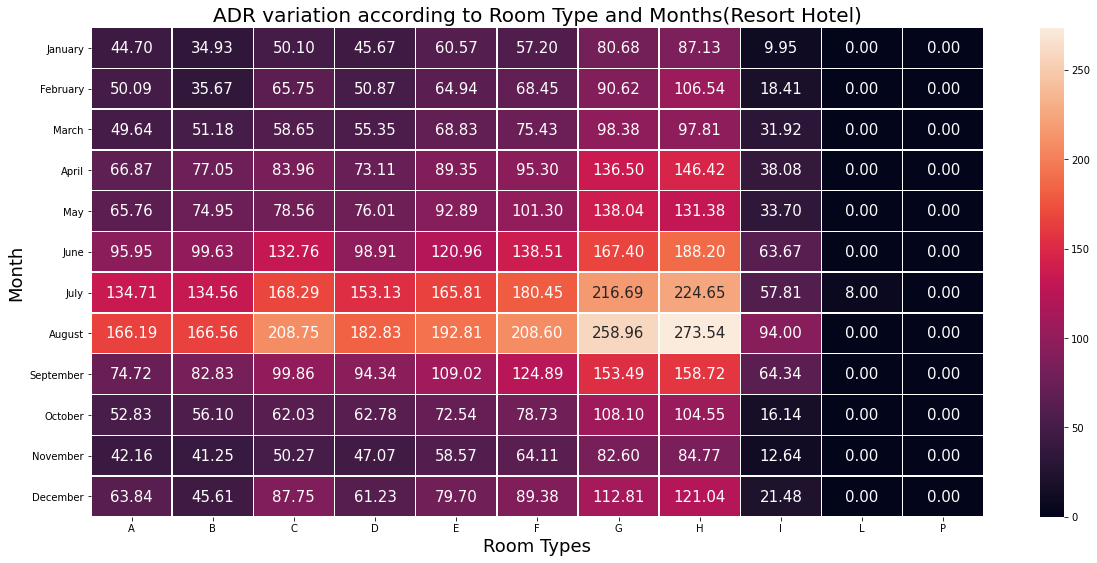

In [78]:
fig, ax1 = plt.subplots(figsize=(20,9))
sns.heatmap(adr_resort_df,ax= ax1, linewidths=0.5, annot= True, annot_kws={'size':15}, fmt='0.2f')
ax1.set_ylabel('Month', fontsize=18)
ax1.set_xlabel('Room Types', fontsize=18)
ax1.set_title('ADR variation according to Room Type and Months(Resort Hotel)', fontsize=20)


Text(0.5, 1.0, 'ADR variation according to Room Type and Months(City Hotel)')

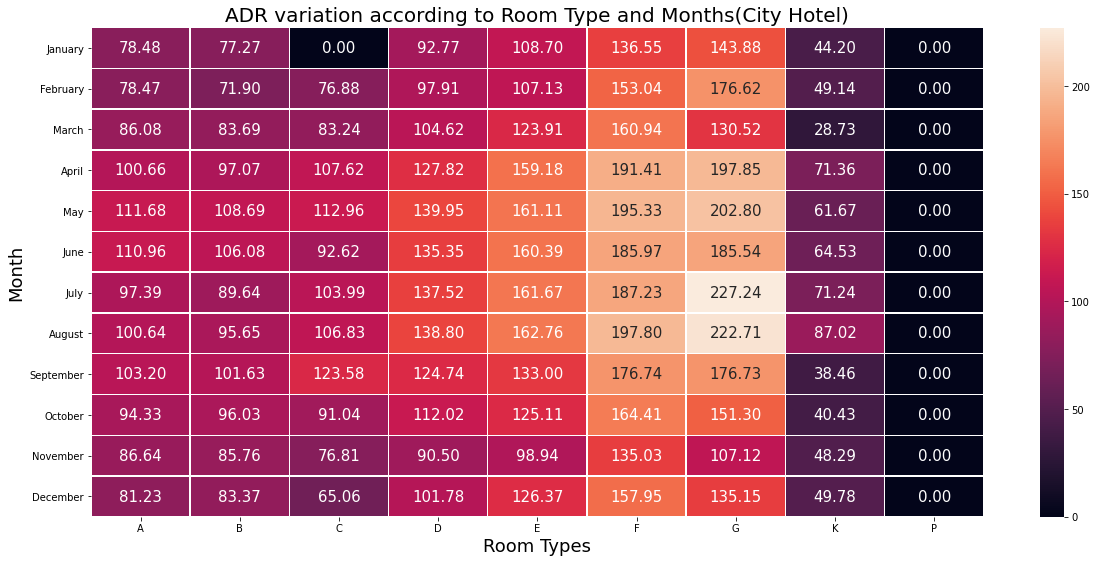

In [79]:
fig, ax2=plt.subplots(figsize= (20,9))
sns.heatmap(adr_city_df,ax=ax2, linewidths=0.5, annot= True, annot_kws={'size':15}, fmt='0.2f')
ax2.set_ylabel('Month', fontsize=18)
ax2.set_xlabel('Room Types', fontsize=18)
ax2.set_title('ADR variation according to Room Type and Months(City Hotel)', fontsize=20)

In [80]:
hotel_df_copy['hotel']=hotel_df_copy['hotel'].convert_dtypes(convert_string= True)

In [81]:
hotel_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  string 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            